# Convolutional Neural Networks

## Content
* Definition
* Convolution
    * Simple Convolution
    * Convolution with stride
    * Convolution with stride and zero padding
    * Max Pooling
    * Activation Functions
    * Muliple Input and Output Channels
* Convolutional Neural Network
* Torch Vision Models
* Graphics Processing Unit

Required tools

In [1]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Required config

In [2]:
torch.manual_seed(0)

## Convolution
In general, convolution is a linear operation similar to a linear equation, dot product, or matrix multiplication. Convolution has several advantages for analyzing images. 

* Feature Extraction: Convolution allows you to extract features from an image efficiently. By convolving an image with various filters or kernels, you can highlight specific patterns, edges, or textures present in the image. These features are essential for tasks like object detection, recognition, and segmentation.

* Dimensionality Reduction: Convolutional operations typically involve moving a filter/kernel over the entire image, computing a dot product at each position. This process reduces the spatial dimensions of the image while preserving important information. This reduction in dimensionality makes subsequent processing more computationally tractable.

* Translation Invariance: Convolution provides translation-invariance properties. This means that once you've learned a pattern in one part of the image, the network can recognize it in other parts as well. This is crucial for tasks where the spatial location of the features is not important, such as object recognition.

* Parameter Sharing: In convolutional layers, the same set of weights (kernel) is used across different spatial locations of the input image. This parameter sharing significantly reduces the number of parameters in the model, making it more efficient and easier to train, especially when dealing with large images.

* Sparse Interactions: Each output feature map in a convolutional layer is computed by a subset of the input neurons, determined by the size of the filter/kernel and the stride. This sparse connectivity reduces the computational cost compared to fully connected layers, where each output neuron depends on all input neurons.

* Hierarchical Representation: Convolutional neural networks (CNNs) typically consist of multiple convolutional layers stacked on top of each other, followed by pooling layers and fully connected layers. This hierarchical structure allows the network to learn increasingly complex and abstract representations of the input image, capturing both low-level features like edges and high-level features like object parts and shapes.

* Efficient Implementation: Convolution operations can be efficiently implemented using techniques like fast Fourier transform (FFT) or specialized hardware like GPUs or TPUs. This enables real-time processing of high-resolution images and makes convolutional networks practical for various applications, including real-time video analysis and mobile devices.

### Simple convolution

Let $I\in\mathcal{M}^{(\mathbb{R})}_{M}$, $K\in\mathcal{M}^{(\mathbb{R})}_{Q}$ where $M\geq Q$. The convolution is defined as following linear operation:
$$ *: \mathcal{M}^{(\mathbb{R})}_{M}\times \mathcal{M}^{(\mathbb{R})}_{Q} \longrightarrow \mathcal{M}^{(\mathbb{R})}_{(M-Q+1)} $$
where:
$$C(i,j) = \sum_{m=0}^{Q-1}\sum_{n=0}^{Q-1} I(i+m,j+n)K(m,n)$$

Alternatively, if $I^{sub}_{i,j}\in\mathcal{M}^{)\mathbb{R})}_{Q}$ is the  $I$ submatrix that starts on $(i,j)$, then:
$$C(i,j) = I^{sub}_{ij}\odot K$$
  
* $I$ is a tensor that represents one channel of an image.
* $K$ is called the kernel.
* $C$ is called the convolution or activation map.

We also may add a bias term which would be a constant matrix $B\in\mathcal{M}^{(\mathbb{R})}_{(M-Q+1)}$ that would be added to the convolution $I*K$. Thus, we'd have:
$$C = I*K + B$$

In order to perform convolution with one input channel and one output channel, given $I$ the one channel image and $K$ the kernel,  use the following code:  
`import torch.nn as nn`  
`conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = Q)`  
PyTorch randomly initislizes the kernel parmeters, like linear parameters. In order to select a specific kernel, do as follows:    
`conv.state_dict()['weight'] = K`  
`conv.state_dict()['bias'] = torch.tensor([0.0])`  
  

Note that de objects `I` and `K` must be of dimension 4. The first dimesion is the number of inputs, the second dimension the number of channels and the thrid and fourth dimension the mtrix. If this matrices just have two dimensions, reshape as follows:  
`I = I.reshape(1,1,M,M)`  
`Q = Q.reshape(1,1,Q,Q)` 

Just to illustrate the process, consider the following greyscale image:
$$ I = 
\begin{pmatrix}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7  \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15 \\
\end{pmatrix}
$$
And the following kernel:
$$ K = 
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
$$
Note that $I\in\mathcal{M}^{\mathbb{R}}_{4}$ and $K\in\mathcal{M}^{\mathbb{R}}_{2}$ so $C\in\mathcal{M}^{\mathbb{R}}_{3}$ with 
$C(i,j) = \sum_{m=0}^{1}\sum_{n=0}^{1} I(i+m,j+n)K(m,n)$. Here we go using sums.  

* $C(0,0) = \sum_{m=0}^{1}\sum_{n=0}^{1} I(m,n)K(m,n) = (0)(1) + (1)(0) + (4)(0) + (5)(1) = 5$  
.  
.  
.  
* $C(2,2) = \sum_{m=0}^{1}\sum_{n=0}^{1} I(2+m,2+n)K(m,n) = (10)(1) + (11)(0) + (14)(0) + (15)(1) = 25$

Alternatively, 

* $C(0,0)$ = $\begin{pmatrix}
0 & 1  \\
4 & 5  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(0)(1) + (1)(0) + (4)(0) + (5)(1) = 5$  
.  
.  
.  
* $C(2,2)$ = $\begin{pmatrix}
10 & 11  \\
14 & 15  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(10)(1) + (11)(0) + (14)(0) + (15)(1) = 25$


Anyway,the convolution or activation map would be as follows:
$$ C =
\begin{pmatrix}
5 & 7 & 9  \\
13 & 15 & 17 \\
21 & 23 & 25 \\
\end{pmatrix}
$$

In [53]:
# Define one channel image and kernel
I = torch.arange(16).reshape(1,1,4,4).float()
K = torch.eye(2).reshape(1,1,2,2).float()

# Define convolution object
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size = 2)
# Set kernel into convolution object
conv.weight.data = K
conv.bias.data = torch.tensor([0.0])

# Make convolution
conv_I = conv(I)
conv_I

tensor([[[[ 5.,  7.,  9.],
          [13., 15., 17.],
          [21., 23., 25.]]]], grad_fn=<ConvolutionBackward0>)

### Convolution with stride  
Let $I\in\mathcal{M}^{(\mathbb{R})}_{M}$, $K\in\mathcal{M}^{(\mathbb{R})}_{Q}$ where $M\geq Q$, $s\in\mathbb{N}$. Suppose $\frac{M-Q}{s}+1 \in\mathbb{N}$ . The convolution is defined as following linear operation:
$$ *: \mathcal{M}^{(\mathbb{R})}_{M}\times \mathcal{M}^{(\mathbb{R})}_{Q} \longrightarrow \mathcal{M}^{(\mathbb{R})}_{(\frac{M-Q}{s}+1)} $$
where:
$$C(i,j) = \sum_{m=0}^{Q-1}\sum_{n=0}^{P-1} I(is+m,js+n)K(m,n)$$

Alternatively, if $I^{sub}_{i,j}\in\mathcal{M}^{(\mathbb{R})}_{Q}$ is the  $I$ submatrix that starts on $(is,js)$, then:
$$C(i,j) = I^{sub}_{ij}\odot K$$
  
* $I$ is a tensor that represents one channel of an image.
* $K$ is called the kernel.
* $C$ is called the convolution or activation map.

We also may add a bias term which would be a constant matrix $B\in\mathcal{M}^{(\mathbb{R})}_{(M-Q+1)}$ that would be added to the convolution $I*K$. Thus, we'd have:
$$C = I*K + B$$
  
The stride $s$ is basically the amount the kernel moves while performing convolution. If the stride equals 1, then the kernel just moves once per iteration, solo it'd be just like simple convolution. But, if it's set to two, then it'd move twice, etc. 

In order to perform convolution with one input channel and one output channel, given $I$ the one channel image, $K$ the kernelm and $s$ the stride value, use the following code:  
`import torch.nn as nn`  
`conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = Q, stride = s)`  
PyTorch randomly initislizes the kernel parmeters, like linear parameters. In order to select a specific kernel, do as follows:  
`conv.state_dict()['weight'] = K`    
`conv.state_dict()['bias'] = torch.tensor([0.0])`  

Note that de objects `I` and `K` must be of dimension 4. The first dimesion is the number of inputs, the second dimension the number of channels and the thrid and fourth dimension the mtrix. If this matrices just have two dimensions, reshape as follows:  
`I = I.reshape(1,1,M,M)`  
`Q = Q.reshape(1,1,Q,Q)` 

Just to illustrate the process, consider the following greyscale image:
$$ I = 
\begin{pmatrix}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7  \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15 \\
\end{pmatrix}
$$
And the following kernel:
$$ K = 
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
$$  
And the following stride value:
$$s = 2$$
Note that $I\in\mathcal{M}^{\mathbb{R}}_{4}$ and $K\in\mathcal{M}^{\mathbb{R}}_{2}$ so $C\in\mathcal{M}^{\mathbb{R}}_{2}$. Here we go
* $C(0,0)$ = $\begin{pmatrix}
0 & 1  \\
4 & 5  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(0)(1) + (1)(0) + (4)(0) + (5)(1) = 5$  
* $C(0,1)$ = $\begin{pmatrix}
2 & 3  \\
6 & 7  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(2)(1) + (3)(0) + (6)(0) + (7)(1) = 9$
* $C(1,0)$ = $\begin{pmatrix}
8 & 9  \\
12 & 13  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(8)(1) + (9)(0) + (12)(0) + (13)(1) = 21$    
* $C(1,1)$ = $\begin{pmatrix}
10 & 11  \\
14 & 15  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(10)(1) + (11)(0) + (14)(0) + (15)(1) = 25$
  
The convolution or activation map would be as follows:
$$ C =
\begin{pmatrix}
5 & 9  \\ 
21 & 25 \\
\end{pmatrix}
$$

In [55]:
# Define one channel image and kernel
I = torch.arange(16).reshape(1,1,4,4).float()
K = torch.eye(2).reshape(1,1,2,2).float()

# Define convolution object
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size = 2, stride = 2)
# Set kernel into convolution object
conv.weight.data = K
conv.bias.data = torch.tensor([0.0])

# Make convolution
conv_I = conv(I)
conv_I

tensor([[[[ 5.,  9.],
          [21., 25.]]]], grad_fn=<ConvolutionBackward0>)

### Convolution with stride and zero padding 
It may occur that $\frac{M-Q}{s}+1 \not\in\mathbb{N}$. If so, we use a technique called zero padding. This consist in defining a matrix $I^{'}\in\mathcal{M}^{(\mathbb{R})}_{M+2p}$ by adding a row zero-vectors on the top and bottom of the matrix $I$ and a column zero-vector on the left and right  of the matrix $I$ in order that $\frac{M^{'}-Q}{s}+1 \in\mathbb{N}$. Padding $p = 1$ will do it once (add 4 zero-vectors), padding $p = 2$ will do it twice (add 8 zero-vectors), and so on. Then, just perfrom the requiered convolution as defined in convolution with stride, starting by the top and the left of the matrix. It may be required that you ignore zeros in the bottom and the right of the matrix that don't fit into the calculations. The resultant convolution will be $C\in\mathcal{M}^{(\mathbb{R})}_{\left\lfloor \frac{{M+2p-Q}}{s} + 1 \right\rfloor
}$.
  
In order to do so, when creating the convolution onject `conv`, add the parameter `padding = 1` as follows:  
`conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = Q, stride = s, padding = p)`  
Then, continue as defined in convolution with stride.

Just to illustrate the process, consider the following greyscale image:
$$ I = 
\begin{pmatrix}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7  \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15 \\
\end{pmatrix}
$$
And the following kernel:
$$ K = 
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
$$  
And the following stride value:
$$s = 3$$
Note that $I\in\mathcal{M}^{\mathbb{R}}_{4}$ and $K\in\mathcal{M}^{\mathbb{R}}_{2}$, so $\frac{4}{3} + 1\not\in\mathbb{N}$. We'll apply zero padding. Think of I as follows:
$$ I = 
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0    \\
0 & 0 & 1 & 2 & 3 & 0    \\
0 & 4 & 5 & 6 & 7  & 0\\
0 & 8 & 9 & 10 & 11 & 0 \\
0 & 12 & 13 & 14 & 15 & 0\\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$
And $\frac{6}{3} + 1 \in\mathbb{N}$. We'll proceed with convolution with stride and $C\in\mathcal{M}^{\mathbb{R}}_{2}$
* $C(0,0)$ = $\begin{pmatrix}
0 & 0  \\
0 & 0  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(0)(1) + (0)(0) + (0)(0) + (0)(1) = 0$  
* $C(0,1)$ = $\begin{pmatrix}
0 & 0  \\
2 & 3  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(0)(1) + (8)(0) + (0)(0) + (12)(1) = 12$
* $C(1,0)$ = $\begin{pmatrix}
0 & 8  \\
0 & 12  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(8)(1) + (9)(0) + (12)(0) + (13)(1) = 21$    
* $C(1,1)$ = $\begin{pmatrix}
10 & 11  \\
14 & 15  \\
\end{pmatrix}
\odot
\begin{pmatrix}
1 & 0  \\
0 & 1  \\
\end{pmatrix}
=(10)(1) + (11)(0) + (14)(0) + (15)(1) = 25$
  
The convolution or activation map would be as follows:
$$ C =
\begin{pmatrix}
0 & 3  \\ 
12 & 25 \\
\end{pmatrix}
$$

In [ ]:
# Define one channel image and kernel
I = torch.arange(16).reshape(1,1,4,4).float()
K = torch.eye(2).reshape(1,1,2,2).float()

# Define convolution object
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size = 2, stride = 3, padding = 1)
# Set kernel into convolution object
conv.weight.data = K
conv.bias.data = torch.tensor([0.0])

# Make convolution
conv_I = conv(I)
conv_I

### Max pooling
Max pooling will reduce the size of the activation maps reducing the number of parameters. It will also reduce the impact of small changes in the image. It coud be also apllied to an image that has not been convoluted. 

Given a tensor $I\in\mathcal{M}^{(\mathbb{R})}_{M}$ that represents one channel of an image, the max pooling is defined as follws:
$$ MP: \mathcal{M}^{(\mathbb{R})}_{M}\times \mathbb{N} \longrightarrow \mathcal{M}^{(\mathbb{R})}_{(M-Q+1)} $$
where:

$$MP(i,j) = \max({I^{sub}_{ij}})$$  
  
with $I^{sub}_{i,j}\in\mathcal{M}^{(\mathbb{R})}_{Q}$ is the  $I$ submatrix that starts on $(i,j)$

* $I$ is a tensor that represents one channel of an image.
* $MP$ is called the max pooled activation map.
  
In order to perform max pooling given $I$ the one channel image, and a kernel size $ks$ $(KS\leq M)$ use the following code:
``

It is possible to apply stride and zero padding analogous to convolution operation.

In [3]:
# Define one channel image and kernel size
I = torch.arange(16).reshape(1,1,4,4).float()
ks = 2

# Define max pooling object
mp = torch.nn.MaxPool2d(kernel_size = 2, stride = 1)

# Make max pooling
mp_I = mp(I)
mp_I

tensor([[[[ 5.,  6.,  7.],
          [ 9., 10., 11.],
          [13., 14., 15.]]]])

### Activation function
In order to apply an activation function to an image for convolution do as follows:
1. Apply convolution to the tensor that represents one channel of an image and the kernel to get the activation map.
2. Apply max pooling to the activation map using a kernel size. 
3. Apply an activation function to the max-pooled activation map.

### Muliple Input and Output Channels

#### Multiple output convolution
-----> First, we'll discuss multiple output channels.
As you recall in the first case, we had the image or tensor X, we performed convolution with a kernel, and then we get an activation map. For multiple output channels, we have multiple kernels. Each kernel will produce a different activation map. We create a convolution object, we specify the number of output channels in this case three.
We will create an image, these two parameters here will be the number of images,
or mini batch size, and the second element will be the number of channels, in this case 1.
We perform the convolution, just to note, because PyTorch randomly initializes our tensors,
we're going to set some nice values up using convolution kernels people have already come up with before.
We have an input image X, we then perform three convolutions,
each have three outputs, denoted by Z0, Z1, and Z2.
Let's convert the tensor into an image of a vertical line and look at the outputs.
We perform the convolution and for each channel we have an output. If you look at these two activation maps they are basically a constant value.
If you look at the result of this activation map it has a different output, this kernel can actually detect the edge.
In general we can see that certain kernels can be used to detect certain features in an image. Let's see what happens when we apply a different image.
We will create a second image, we will perform the convolution using the same kernels.
We have the image it’s a horizontal line. Let's take a look at the output channels.
The output of this channel detected the horizontal line. Essentially this kernel is actually a horizontal line detector.
For the other two kernels nothing happened. To reiterate, different kernels detect different features in the image.
In general, if we have three output channels when we perform convolution,
every channel will have its own independent kernel and bias term as well and output three activation maps.
The kernel channel is the first element in the shape attribute for each output.
For the output the first axis corresponds to the sample and the second axis corresponds to each activation map.

In [32]:
# Create convolution output with 3 output channels
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [34]:
# Assign weights for each convolution kernel
Gx = torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy = torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])
conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

# Set bias to zero
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

# See kernels
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


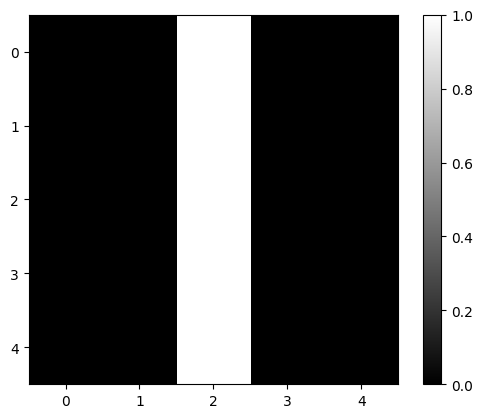

In [37]:
# Create an image
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1

# Plot the image
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

The result is a 1x3x3x3 tensor. This represents one sample with three channels, and each channel contains a 3x3 image.

In [39]:
# Apply convolution
out=conv1(image)
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


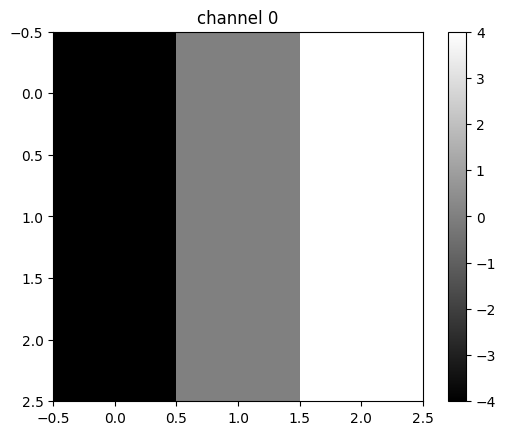

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


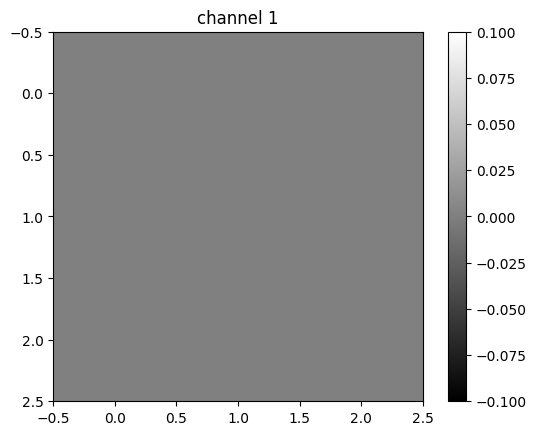

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


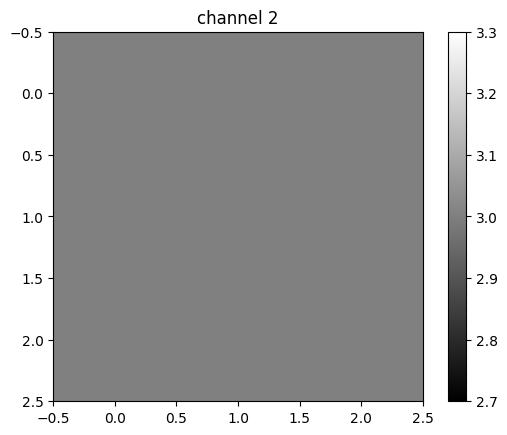

In [40]:
# See convoluted images
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


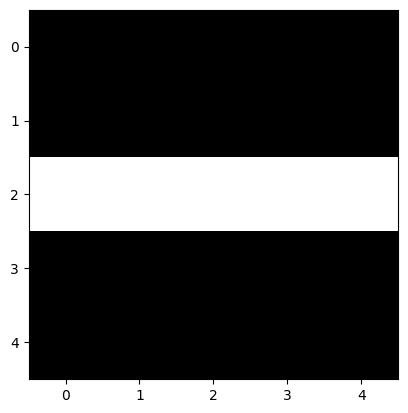

In [41]:
# LEt's try anothe rimage
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


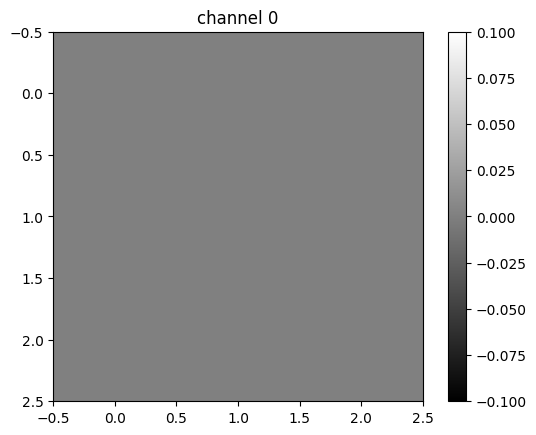

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


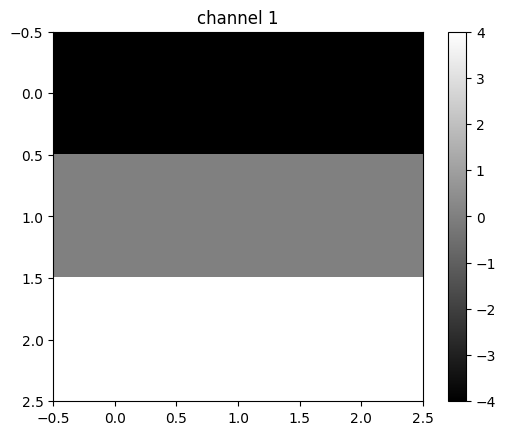

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


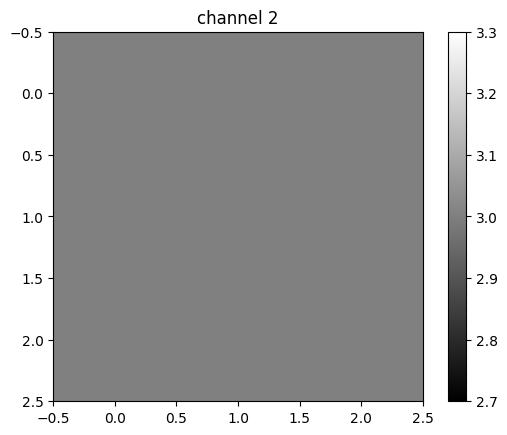

In [42]:
# Appli convolution and see the images
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

### Multiple Input Channels
-----> Now, let's discuss multiple input channels. You might have multiple input channels in an RGB image, where each channel represents a different intensity of red, green, and blue. Usually We'll have multiple channels in a convolutional neural network. This should not be confused with 3D convolutionas each convolution is still 2D.
For multiple input channel convolution, we’ll have one output, and for every input channel
we'll have our own kernel k, we’ll perform convolution with that kernel
with the corresponding input channel, we'll add the results together, and we'll get an output.
A matrix analogy is helpful, where our parameters are like a row vector and our input images are like a column vector,
we perform the dot product operation, but instead of performing multiplication we’ll perform convolution.
We preform convolution with the first kernel and image,
then the second kernel and channel we add the results and get the output.
Let's do an example with two input channels, we will use the following values for the kernel the bias will be zero.
Here’s the image it will have two channels, for channel 1 here is the image or tensor,
also for channel 2.
We will perform convolution on the first channel, then we'll perform convolution with the second channel.
we will then add the results for each convolution together.

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


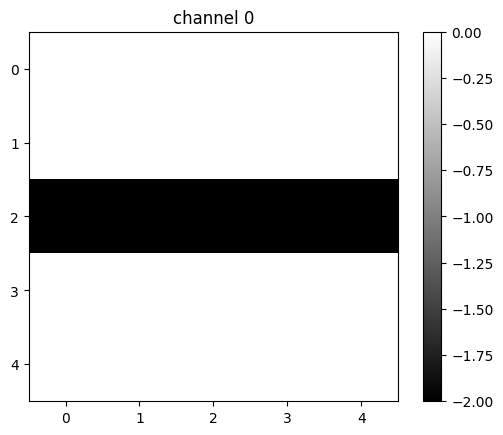

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


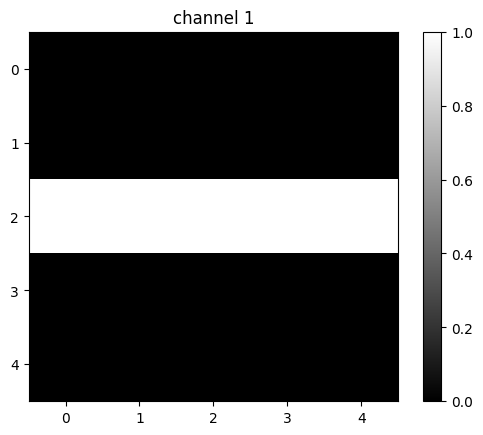

In [44]:
# Create image with two channles 
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1

# Plot each channel
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [47]:
# Create a <code>Conv2d</code> object with two inputs:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

# Assign kernel values. One per input
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

# See kernels
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

torch.Size([1, 1, 3, 3])
tensor([[ 0.,  0.,  0.],
        [-4., -4., -4.],
        [ 0.,  0.,  0.]], grad_fn=<UnbindBackward0>)


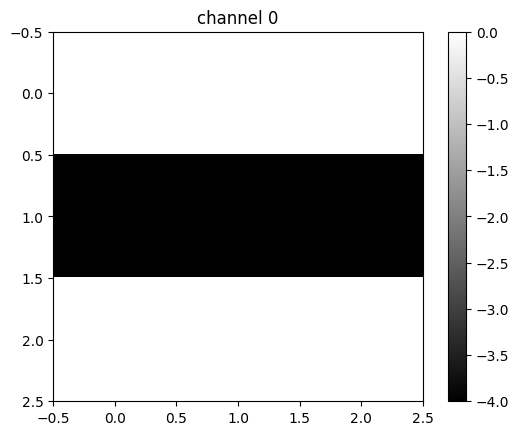

In [53]:
# Apply convolution
conv_mi = conv3(image2)
print(conv_mi.shape)
for channel,image in enumerate(conv_mi[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

#### Multiple Input Output Convolution
-----> Now we'll discuss multiple-input and output channels.
Let's create a convolution object with 2 input channels,
we represent each channel with a block with 3 output channels.
Each output channel will have two sets of kernels, for each input channel.
For the first output we have these two kernels, and we take our two inputs and we perform convolution with those two kernels,
we add the results together we then have the final output.
For the second output channel we do the exact same thing, we take the two inputs with each of the corresponding kernels,
we perform convolution, add up the results, we get the second output channel.
For the final output, we have two kernels each for the two inputs,
we perform the convolution and add the results together, we then get the final output.
Its helpful to think of the process like matrix multiplication. The kernels are elements in the matrix,
the number of inputs are the number of columns and the number of outputs are the number of rows.
We have two inputs represented by a two element column vector.
We perform the multiplication and we get three outputs.
Here's the formula for the multi-channel convolution, where L is the output channel and K is the input index.
Let's look at an actual example, let's see how the actual different kernels look like.
Just a note, PyTorch randomly initializes the kernels, but in the lab we specify custom values for you to use.
We have the kernels for the first input channel, the kernels for the second input channel,
and the kernels for the third input channel.
We'll create an input image, the first channel will be the following image,
the second channel will be the following image. Let's see the output for the different channels.
Here's our equation again and we'll just write down the expression for the first channel,
we’ll set the bias term equal to zero. For the 1st output,
for the first channel we convolve it with the first kernel, we do the same with the second kernel and second input.
We add the results of each operation, we get an activation map.
For the second output channel we repeat the process convolving the two channels. (
We add the activation map, getting the second output.
We do the same for the final channel. 



In [55]:
# Create convolution object and initialize kernels

conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


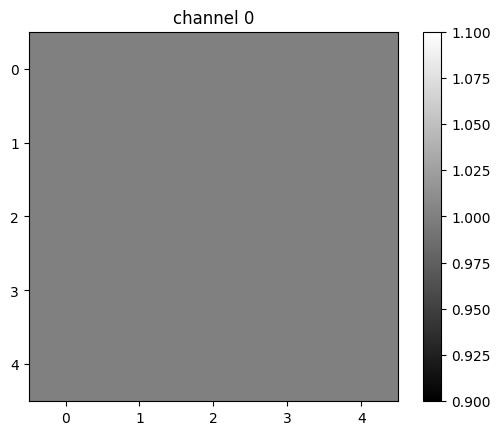

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


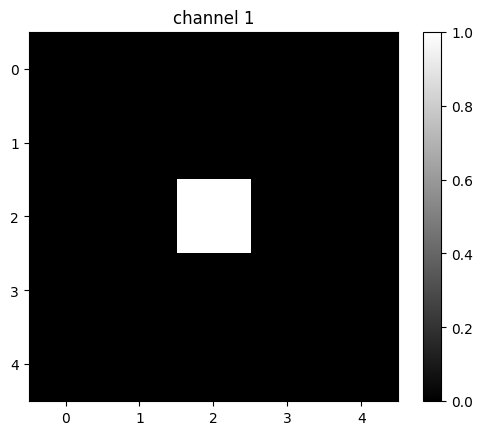

In [56]:
# Two channel image
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

torch.Size([1, 3, 3, 3])
tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 1.0000, 0.5000],
        [0.5000, 0.5000, 0.5000]], grad_fn=<UnbindBackward0>)


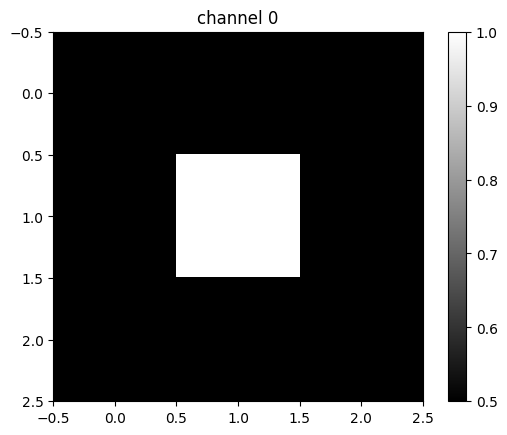

tensor([[1., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.]], grad_fn=<UnbindBackward0>)


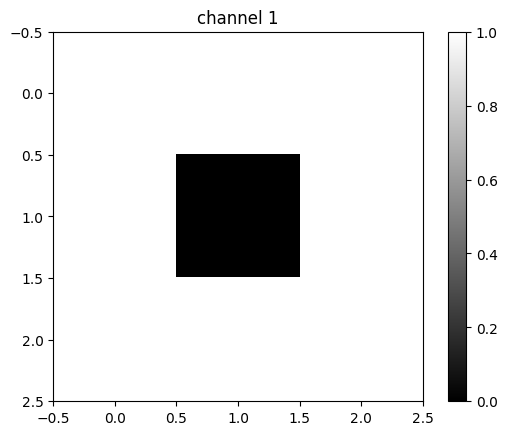

tensor([[-1., -2., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  2.,  1.]], grad_fn=<UnbindBackward0>)


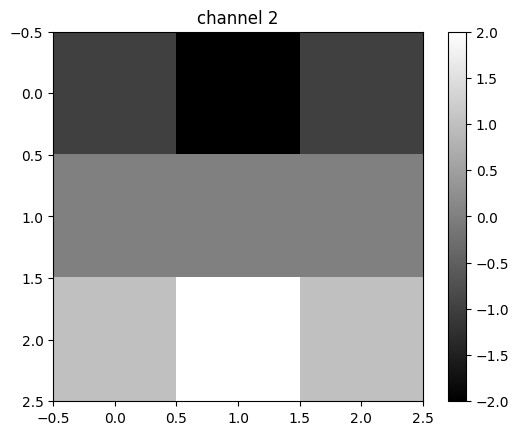

In [57]:
# Convolute
z=conv4(image4)

print(z.shape)
for channel,image in enumerate(z[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

## Convolutional Neural Networks
In this video, we're going to discuss convolutional neural networks. CNN for short.
We will discuss, The Convolutional Neural Network Constructor, The Forward Step, Training in PyTorch.
This is the standard picture you might see for a convolutional neural network.
It looks similar to a regular network, in this example we have one hidden layer, we have one output layer
we have the convolution kernels. Like the hidden and output layer parameter these they’re obtained via training
we have the Activation Map where we can apply the activation functions.
Then we have the pooling layer applied to each channel, this diagram can get a little complicated so let's build an extremely simple cnn.
Let's start off with a really simple example. We are going to try to distinguish between a horizontal line and a vertical line.
In the vertical line, Y will equal 0, and in the horizontal line, y will equal 1.
To make things interesting, we're going to add some noise. The next sample for y = 0 might look like this,
also the next sample for y=1 may look like this.
Let's build a simple CNN, with two convolution layers and an output layer.
We have the image X, lets remove it to make everything more clear.
Our first convolutional layer we will have two channels. We are going to apply the convolution operation
we then get our activation map for each kernel, we then apply the activation function.
We will then apply pooling, we now have two outputs. For our second layer we'll have two inputs and one output,
this will correspond to two kernels. We'll convolve the outputs of the preceding layer with its own kernel,
and add the results together, the result is one activation map.
After the final step, we apply an activation function and max-pooling to produce an output.
this is the output of our second convolutional layer.
We simply flatten or reshape this output of the max pooling layer, for example if the output of the max pooling layer is 7 units of width
and 7 units of height, we flatten or reshape the tensor to a 1D tensor with 49 components.
Sometimes calculating the shape of this output is the hardest part.
This is then used as in input to a fully connected neural network. In this lab we will use one output layer.
In summery, we have two convolution kernels these are parameters that we get via training.
The activation map where we apply the activation function and max pooling,
a second set of kernels as before these are parameters that we get via training,
the second activation map where we apply the activation function and max pooling, we flatten this output
and use this as an input to a neural network. This can get confusing so lets look at an other view to get a better understanding.
We have the two channels corresponding to our first convolution layer, the second two channels corresponding to our second convolution layer,
We will apply the activation function and max pooling to the first activation map. We take the two outputs from our first layer,
convolve them together and add the results. We will apply the activation function and pooling to the activation map
then we flatten this output, this is used as an input to the fully connected layers to make a classification.
As it gets difficult to calculate the shape of the network we will only include two parameters,
the number of output channels for our first convolution layer, the number of output channels for our second convolution layer.
Let's review the Convolutional Neural Network Constructor.
Let's review the object constructor for the cnn . We produce a 2d convolution object cnn1.
As we are going to use gray scale images we will only have one input channel.
The number of output channels in this case two, we also include the kernel size and padding size.
We add a max pooling object with kernel size and stride size, we will include the activation function in the forward step.
We then add the second convolution layer, the number of inputs for the second layer is equal to the number of outputs for the first layer,
and the number of outputs for the second layer will be 1, we will also include the stride, size and padding size.
We will add a second max pooling layer. We will add
an output
linear layer, we can determine the shape of the output channel using
the formulas we used in the previous section. For this, it will be 7 by 7
as a result when we flatten the output it will have 49 elements.
As a result our final layer will include two neurons one for each class, each neuron will have an input dimension of 49.
Lets review theForward method
This is the Forward Method.
In the forward step, we apply the convolution.
We then apply the activation function and max pooling for the first layer and assign it to x.
We take the output x, we the apply the second convolution layer
we then apply the activation function and max pooling, we now have
an output.
We reshape the output using the method view, this converts our rectangle input to a 1d input.
We then apply the linear layer.
Training in PyTorch, we can use back propagation to update the parameters including the
two convolution layers and the hidden layers.
Training is identical we create our data set object and our cnn model.
The criterion function, our optimizer, some parameter's for training, our train loader and validation loader.
We then train the model, see the lab for more details.
We can see as the cost decreases the accuracy goes up, check the lab for more details.



  